#### Adamantios Zaras AM: 06
#### Panagiotis Souranis AM: 17

# Description

In this part of the project, 

# Global

## Imports

In [0]:
!git clone https://github.com/hsoleimani/MLTM.git

In [0]:
import warnings
from random import randint

import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as sp
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

from utils import load_dataset, hyperparameters_search
warnings.filterwarnings("ignore")

## Prepare Dataset

In [0]:
# Load dataset.
X_train, y_train, X_test, y_test, word_index = load_dataset(ngram_range=1, 
                                                            path='MLTM/Data/Delicious', 
                                                            maxlen=200, binary=True)

# Split test set to test and unlabeled.
print('Splitting test data to test and unlabeled sets.')
X_unlabeled, X_test, y_hidden, y_test = train_test_split(X_test, y_test, 
                                                         test_size=.5, random_state=0)
print('{} test sequences.'.format(X_test.shape[0]))
print('{} unlabeled sequences.'.format(X_unlabeled.shape[0]))

# Hyperparameters search

In [0]:
# Define classifiers.
classifiers = {
        'SVM': LinearSVC(random_state=0),
        'Tree': DecisionTreeClassifier(random_state=0),
        'Bayes': MultinomialNB()
}

## Random Search

In [0]:
# Create param dists.
svm_param_dist = {'C': 10 ** np.random.uniform(-3, 3, size=7000)}
tree_param_dist = {'max_depth': scipy.stats.randint(1, 30),
                   'max_features': scipy.stats.randint(1, X_train.shape[1]),
                   'min_samples_split': scipy.stats.randint(2, X_train.shape[0] / 2),
                   'criterion': ['gini', 'entropy']
}
# Add param dists to a list.
params_list = [svm_param_dist, tree_param_dist]

# Perform random search.
for key, classifier ,params in zip(classifiers.keys(), classifiers.values(), params_list):
    hyperparameters_search(classifier, params, X_train, y_train, 'Accuracy',
                           {'Accuracy': make_scorer(accuracy_score)}, key, 
                           candidates=100, cv=5, random_search=True, verbose=5)


Εstimator : SVM
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 37.0min finished


Best parameters found for Estimator : SVM
{'C': 118.2089155014123}

Best score found for Accuracy Score metric : 0.560

Εstimator : Tree
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 163 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.0min finished


Best parameters found for Estimator : Tree
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 49, 'min_samples_split': 2646}

Best score found for Accuracy Score metric : 0.616


## Grid Search

In [0]:
# Create parameter grids.
svm_grid = {'C': np.arange(110, 130, .5)}
tree_grid = {
        'max_depth': range(5, 9),
        'max_features': range(45, 55),
        'min_samples_split': range(2645, 2648),
        'criterion': ['gini']
}
bayes_grid = {'alpha': np.arange(0, 10, 0.2)}
# Add param grids to a list.
params_list = [svm_grid, tree_grid, bayes_grid]

# Perform grid search.
for key, classifier ,params in zip(classifiers.keys(), classifiers.values(), params_list):
    hyperparameters_search(classifier, params, X_train, y_train, 'Accuracy',
                           {'Accuracy': make_scorer(accuracy_score)}, key, 
                           cv=10, random_search=False, verbose=10)


Εstimator : SVM
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 11

Best parameters found for Estimator : SVM
{'C': 110.0}

Best score found for Accuracy Score metric : 0.505

Εstimator : Tree
Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1638s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 244 tas

Best parameters found for Estimator : Tree
{'criterion': 'gini', 'max_depth': 7, 'max_features': 54, 'min_samples_split': 2645}

Best score found for Accuracy Score metric : 0.614

Εstimator : Bayes
Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0799s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 424 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 484 tas

Best parameters found for Estimator : Bayes
{'alpha': 4.800000000000001}

Best score found for Accuracy Score metric : 0.491


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   15.5s finished


## Final classifier

In [0]:
# Create the best classifier found from the search.
clf = DecisionTreeClassifier(criterion='gini', max_depth=7, max_features=54, 
                             min_samples_split=2645, random_state=0)

# Apply Method

In [0]:
# Initialize lists to hold the accuracy results of the two methods.
uncertainty_accuracies, random_accuracies = [], []

# Initialize uncertainty sampling data.
X_train_us = X_train.copy()
y_train_us = y_train.copy()
X_unlabeled_us = X_unlabeled.copy()
y_unlabeled_us = y_hidden.copy()

# Initialize random sampling data.
X_train_rs = X_train.copy()
y_train_rs = y_train.copy()
X_unlabeled_rs = X_unlabeled.copy()
y_unlabeled_rs = y_hidden.copy()

# Run uncertainty sampling and random sampling methods, for 10 iterations.
n_iterations = 10
for i in range(n_iterations):
    print('Iteration {}/{}'.format(i + 1, n_iterations))

    print('Fitting on uncertainty sampling training set...')
    # Train classifier with uncertainty sampling training set.
    clf.fit(X_train_us, y_train_us)
    # Predict on test data.
    y_pred_us = clf.predict(X_test)
    # Get the most uncertain sample from the unlabeled pool.
    uncertain_sample = np.argmin(np.abs(clf.predict_proba(X_unlabeled_us) - 0.5))
    # Calculate accuracy.
    acc_us = accuracy_score(y_pred_us, y_test)
    # Append current accuracy to the uncertainty accuracies array.
    uncertainty_accuracies.append(acc_us)
    # Update uncertainty sampling data.
    X_train_us = np.vstack((X_train_us, X_unlabeled_us[uncertain_sample, :]))
    y_train_us = np.hstack((y_train_us, y_unlabeled_us[uncertain_sample]))
    X_unlabeled_us = np.delete(X_unlabeled_us, uncertain_sample, 0)
    y_unlabeled_us = np.delete(y_unlabeled_us, uncertain_sample, 0)
    print('Predicted accuracy was {}'.format(acc_us))

    print('Fitting on random sampling training set...')
    # Train classifier with random sampling training set.
    clf.fit(X_train_rs, y_train_rs)
    # Predict on test data. 
    y_pred_rs = clf.predict(X_test)
    # Get a random unlabeled sample.
    random_sample = randint(0, len(y_unlabeled_rs))
    # Calculate accuracy.
    acc_rs = accuracy_score(y_pred_rs, y_test)
    # Append current accuracy to the random accuracies array.
    random_accuracies.append(acc_rs)
    # Update random sampling data.
    X_train_rs = np.vstack((X_train_rs, X_unlabeled_rs[random_sample, :]))
    y_train_rs = np.hstack((y_train_rs, y_unlabeled_rs[random_sample]))
    X_unlabeled_rs = np.delete(X_unlabeled_rs, random_sample, 0)
    y_unlabeled_rs = np.delete(y_unlabeled_rs, random_sample, 0)
    print('Predicted accuracy was {}'.format(acc_rs))

Iteration 1/10
Fitting on uncertainty sampling training set...
Predicted accuracy was 0.6039156626506024
Fitting on random sampling training set...
Predicted accuracy was 0.6039156626506024
Iteration 2/10
Fitting on uncertainty sampling training set...
Predicted accuracy was 0.6039156626506024
Fitting on random sampling training set...
Predicted accuracy was 0.6039156626506024
Iteration 3/10
Fitting on uncertainty sampling training set...
Predicted accuracy was 0.6039156626506024
Fitting on random sampling training set...
Predicted accuracy was 0.6039156626506024
Iteration 4/10
Fitting on uncertainty sampling training set...
Predicted accuracy was 0.6039156626506024
Fitting on random sampling training set...
Predicted accuracy was 0.6039156626506024
Iteration 5/10
Fitting on uncertainty sampling training set...
Predicted accuracy was 0.6039156626506024
Fitting on random sampling training set...
Predicted accuracy was 0.6039156626506024
Iteration 6/10
Fitting on uncertainty sampling tra

## Plot Results

Finally, we plot the learning curves of the two methods, in order to compare them.

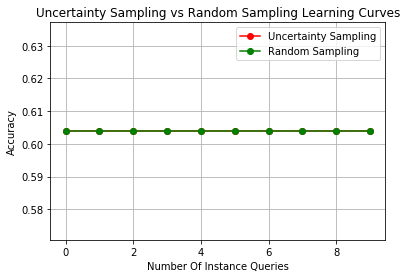

In [0]:
# Create a figure.
plt.figure()
# Set title and labels.
plt.title('Uncertainty Sampling vs Random Sampling Learning Curves')
plt.xlabel('Number Of Instance Queries')
plt.ylabel('Accuracy')

# Create a plot grid.
plt.grid()
# Plot uncertainty and random sampling learning curves.
plt.plot(range(n_iterations), uncertainty_accuracies, 'o-', color="r",
         label="Uncertainty Sampling")
plt.plot(range(n_iterations), random_accuracies, 'o-', color="g",
         label="Random Sampling")

# Show legends, placed at the best possible location.
plt.legend(loc="best")
# Show plot.
plt.show()

As we can see, 

# Conclusion